In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,invgamma

In [2]:
np.random.seed(42)

n = 40

true_mu = 5
true_sigma = 2

data = np.random.normal(loc = true_mu, scale = true_sigma, size = n)

mu_prior_mean = 0
mu_prior_sd = 10
a = 2
b = 2

def log_posterior(mu,sigma):
    if sigma <=0:
        return -np.inf
    
    log_likelihood = np.sum(norm.logpdf(data,loc = mu, scale = sigma))
    log_prior_mu = norm.logpdf(mu, loc = mu_prior_mean, scale = mu_prior_sd)
    log_prior_sigma = invgamma.logpdf(sigma**2, a = a, scale = b)

    return log_likelihood + log_prior_mu + log_prior_sigma

In [5]:
# Metropolis-Hastings Algorithm

mu_current = 0
proposal_sd_mu = 0.5
sigma_current = 1
proposal_sd_sigma = 0.1

samples_mu = []
samples_sigma = []

accepted = 0

for i in range(10000):
    mu_proposed = np.random.normal(mu_current,proposal_sd_mu)

    log_sigma_proposed = np.log(sigma_current) + np.random.normal(0,proposal_sd_sigma)
    sigma_proposed = np.exp(log_sigma_proposed)

    log_r = log_posterior(mu_proposed,sigma_proposed) - log_posterior(mu_current, sigma_current)

    if np.log(np.random.rand()) < log_r :
        mu_current = mu_proposed
        sigma_current = sigma_proposed
        accepted += 1

    samples_mu.append(mu_current)
    samples_sigma.append(sigma_current)

burn_in = 2000
samples_mu = np.array(samples_mu[burn_in:])
samples_sigma = np.array(samples_sigma[burn_in:])

    
   



    

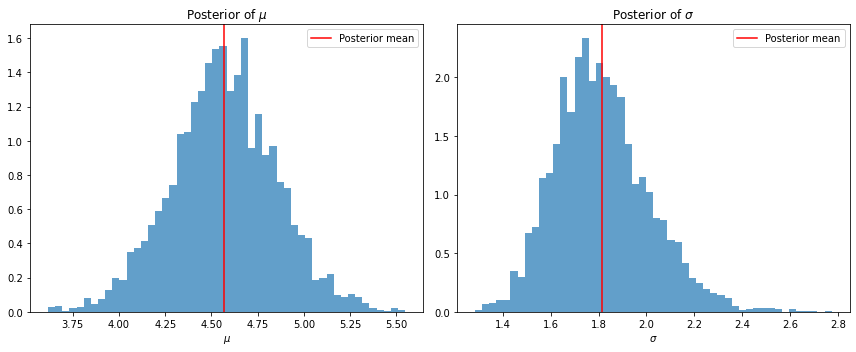

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_mu, bins=50, density=True, alpha=0.7)
plt.axvline(np.mean(samples_mu), color='r', label='Posterior mean')
plt.xlabel(r'$\mu$')
plt.title('Posterior of $\mu$')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_sigma, bins=50, density=True, alpha=0.7)
plt.axvline(np.mean(samples_sigma), color='r', label='Posterior mean')
plt.xlabel(r'$\sigma$')
plt.title('Posterior of $\sigma$')
plt.legend()

plt.tight_layout()
plt.show()